## The irreducible mass of_chi_chi_chi_chi black holes.

This is an example that comes straight out of my research in general relativity.

**Gerosa, Fabbri, Sperhake (2022) "*The irreducible mass and the horizon area of LIGO's black holes*" [arxiv:2202.08848](https://arxiv.org/abs/2202.08848), [CQG 39 (2022) 175008](https://iopscience.iop.org/article/10.1088/1361-6382/ac8332)**

(some of the calculations here were first worked out by Cecilia Fabbri in her BSc thesis with me).

Consider a rotating black hole. In [1969](https://ui.adsabs.harvard.edu/abs/1969NCimR...1..252P/abstract), Roger Penrose (now [Nobel Prize in Physics](https://www.nobelprize.org/prizes/physics/2020/penrose/facts/) for the theory of black holes) discovered that one can extract energy from a rotating black hole:

![](https://inspirehep.net/files/268d28446b405e134199d84f67c23792)

(figure from [Harada, Kimura 2014](https://ui.adsabs.harvard.edu/abs/2014CQGra..31x3001H/abstract)).

Maybe some of you has seen this already in your GR class? In any case, a rotating black-hole has a region called ergosphere such that infalling particles have negative energy. Penrose imagined a particle that enters that region and decays: half will fall in and half will escape to infinity, carring some energy with it. In a nutshell, we've extracted energy=mass from a black hole! It turns out that one also has to extract angular momentum, not just energy (and here you'll need some GR do to this calculation, see e.g. the famous textbook by [Misner, Thorne and Weeler](https://press.princeton.edu/books/hardcover/9780691177793/gravitation)). But angular momentum runs our first, such that a repeated series of Penrose processes leaves behind a non-rotating BH with a remnant mass which is called "irreducible". This is a famous result by [Christodoulou 1970](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.25.1596) and is closely related to the even more famous area law by [Hawking (1971)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.26.1344) (which in turns is the foundation of black-hole thermodynamics -- for you, my theorethical physics friend).

## Exercise instructions

For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
% \label{mirrdef}
\end{equation}
For convenience, let us define 

$$f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}$$

Suppose you have repeated measurments of $M$ and $\chi$. This is just because we're still frequentists for now. When we will put our Bayesian hat on, these distributions will be the *posterior samples* from a single measurement.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.
- (masses and spins are uncorrelated)

These are simplistic assumption that, however, are not too far from what we are now measuring with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

**Tasks**:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

*Hint (for point 2)*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

from astroML import stats as astroMLstats
from sklearn.neighbors import KernelDensity
from scipy.integrate import quad


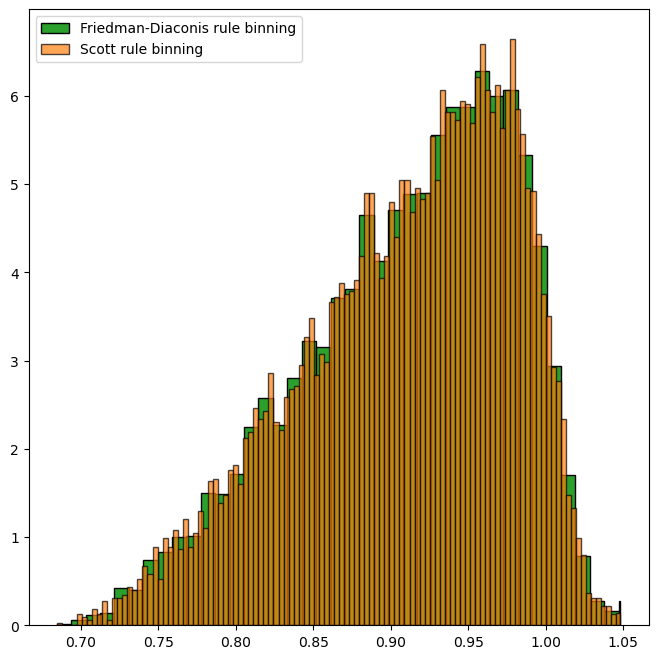

In [107]:
N = 10000
mu = 1
sigma = 0.02

chi = np.random.uniform(0, 1, N)
M = np.random.normal(loc=mu, scale=sigma, size=N)

f_chi =  np.sqrt( (1+np.sqrt(1-chi)) / 2)
M_irr = M * f_chi

binsize_Scott = 3.5*sigma / (N**(1/3)) # Scott's rule, for gaussian or close to#
binsize_FreedmanDiaconis = (2.7*astroMLstats.sigmaG(M_irr)) / (N**(1/3)) # Freedman Diaconis Rule, if the pdf isn't close to gaussian

bins_Scott = np.append(np.arange(start=M_irr.min(), stop=M_irr.max(), step=binsize_Scott) , M_irr.max()) #Complete
bins_FreedmanDiaconis = np.append(np.arange(start=M_irr.min(), stop=M_irr.max(), step=binsize_FreedmanDiaconis) , M_irr.max()) #Complete


fig, ax = plt.subplots(figsize=(8, 8))

plt.hist(M_irr, bins=bins_FreedmanDiaconis, density=True, label='Friedman-Diaconis rule binning', color = 'C2', alpha=1, edgecolor='black')
plt.hist(M_irr, bins=bins_Scott, density=True, label='Scott rule binning', color = 'C1', alpha=0.7,edgecolor='black')

plt.legend()



I think Scott's rule is better...the distribution is close to a gaussian

3. Using the same samples, plot the distribution of $M_{\rm irr}$ using a KDE.

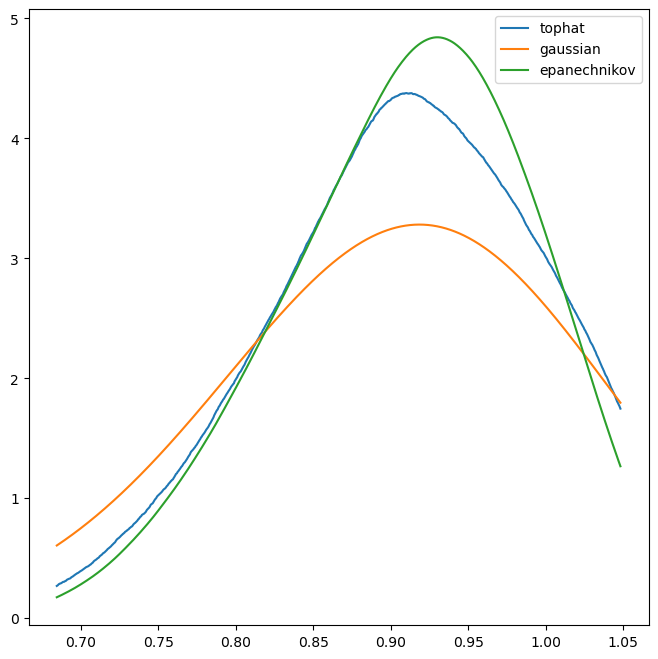

In [108]:
xgrid = np.linspace(M_irr.min(), M_irr.max(), 1000)

def kde_sklearn(M_irr, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(M_irr[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)


fig, ax = plt.subplots(figsize=(8, 8))

PDFtophat = kde_sklearn(M_irr, bandwidth=0.1, kernel="tophat") 
plt.plot(xgrid, PDFtophat, label = "tophat")

PDFtophat = kde_sklearn(M_irr, bandwidth=0.1, kernel="gaussian") 
plt.plot(xgrid, PDFtophat, label = "gaussian")

PDFtophat = kde_sklearn(M_irr, bandwidth=0.1, kernel="epanechnikov") 
plt.plot(xgrid, PDFtophat, label = "epanechnikov")

plt.legend()






4. Compute the KS (Kolmogorov-Smirnov) distance between ${M_{\rm irr}}/\mu$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

Text(0.5, 1.0, 'KS distance between $M_{\\rm irr}$ and $f$')

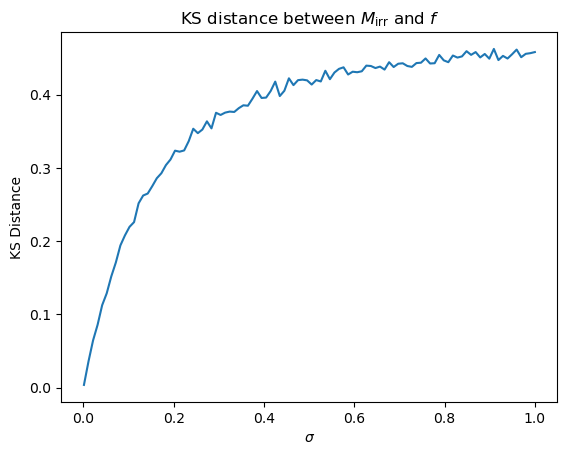

In [109]:
sigmas = np.linspace(0.001, 1.0, 100)
ks_distances_f = []

for s in sigmas:
    N = 10000
    mu = 1

    chi = np.random.uniform(0, 1, N)
    M = np.random.normal(loc=mu, scale=s, size=N)

    f_chi =  np.sqrt( (1+np.sqrt(1-chi)) / 2)
    M_irr = M * f_chi
    
    ks_stats, _ = scipy.stats.ks_2samp( M_irr, f_chi) # underscore is to consider only the first output of the method
    ks_distances_f.append(ks_stats)

plt.plot(sigmas, ks_distances_f)

plt.xlabel("$\\sigma$")
plt.ylabel("KS Distance")
plt.title("KS distance between $M_{\\rm irr}$ and $f$")


_It seems that $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ ..._

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

*Hint (for points 4 and 5)*. This is a KS test between two sets for samples, `scipy.stats.ks_2samp`.

You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$.

Text(0.5, 1.0, 'KS distance between $M_{\\rm irr}$ and $M$')

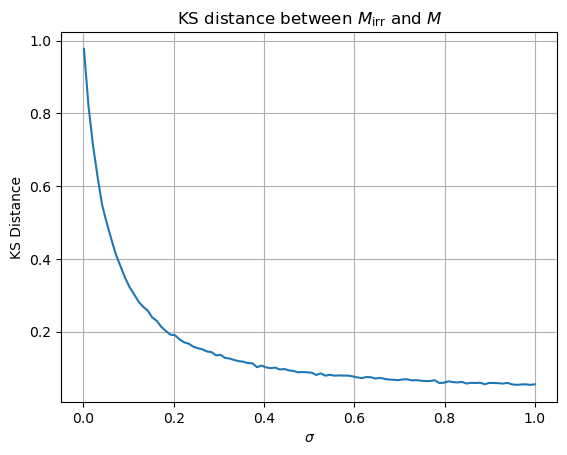

In [110]:
sigmas = np.linspace(0.001, 1.0, 100)
ks_distances_f = []

for s in sigmas:
    N = 10000
    mu = 1

    chi = np.random.uniform(0, 1, N)
    M = np.random.normal(loc=mu, scale=s, size=N)

    f_chi =  np.sqrt( (1+np.sqrt(1-chi)) / 2)
    M_irr = M * f_chi
    
    ks_stats, _ = scipy.stats.ks_2samp( M_irr, M) # underscore is to consider only the first output of the method
    ks_distances_f.append(ks_stats)

plt.plot(sigmas, ks_distances_f)

plt.xlabel("$\\sigma$")
plt.ylabel("KS Distance")
plt.grid()
plt.title("KS distance between $M_{\\rm irr}$ and $M$")

_It seems $M_{\rm irr}$ is distributed like $M$ if $\sigma\gg \mu$..._

7. [**Optional, not examinable**] Compute the pdf of $f$ from its mathematical definition (pen and paper!). Verify this result: 

\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

8. [**Optional, not examinable**]  Compute the pdfs of $M_{\rm irr}$ from its mathematical definition (pen and paper!). Verify this result:

\begin{equation}
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,. %\label{pmirr}
\end{equation}

The this expression is only semi-analytic; that integral should then be solved numerically.

*Hint (for point 8)*: You want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. 

9. Using the expressions from point 7 and 8, plot those pdfs check that they agree with your KDE reconstructions.


C:\Users\simon\AppData\Local\Temp\ipykernel_21548\1923265303.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, 1/np.sqrt(2), 1)


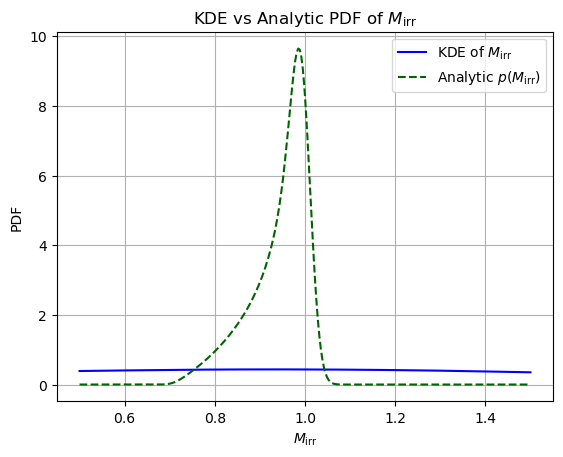

In [ ]:
from sklearn.neighbors import KernelDensity

mu = 1
sigma = 0.02
M_irr_vals = np.linspace(0.5, 1.5, 300)
xgrid = np.linspace(0.5, 1.5, 300)

# pdf of Mirr
def p_Mirr(Mirr, mu=1, sigma=0.02):
    integrand = lambda f_chi: ( # Use lambda to don't define a new function integrand
        np.exp(-((Mirr / f_chi - mu)**2) / (2 * sigma**2)) *
        (2 * f_chi**2 - 1) / (f_chi * np.sqrt(1 - f_chi **2)))
    result, _ = quad(integrand, 1/np.sqrt(2), 1)
    return np.sqrt(2 / np.pi) / sigma * result

# Values of pdf of Mirr
p_vals = [p_Mirr(m) for m in M_irr_vals]

def kde_sklearn(M_irr, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(M_irr[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)

# Values of pdf found with KDE
M_irr = M * f_chi  
pdf_kde = kde_sklearn(M_irr, bandwidth=0.5, kernel="epanechnikov")

plt.plot(xgrid, pdf_kde, label='KDE of $M_{\\rm irr}$', color='blue')
plt.plot(M_irr_vals, p_vals, label='Analytic $p(M_{\\rm irr})$', color='darkgreen', linestyle='--')

plt.xlabel('$M_{\\rm irr}$')
plt.ylabel('PDF')
plt.title('KDE vs Analytic PDF of $M_{\\rm irr}$')
plt.legend()
plt.grid(True)
plt.show()


_PROBLEMSSSSS!!!!!!!!!!_